## 고양이 수염 스티커 만들기🐱

In [1]:
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리

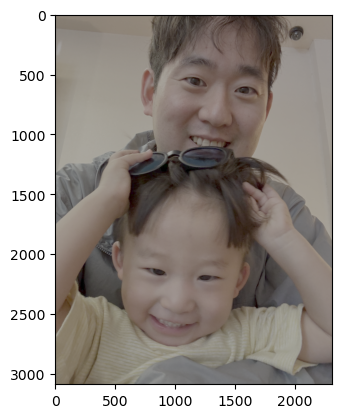

In [2]:
image_path = 'images/IMG_0616.png' # 이미지 경로
img_bgr = cv2.imread(image_path, cv2.IMREAD_UNCHANGED) # OpenCV로 이미지를 불러옵니다, UNCHANGED 옵션 사용하여 알파 채널 포함
img_show = img_bgr.copy() # 출력용 이미지
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # OpenCV는 BGR로 이미지를 읽어오기 때문에 RGB로 변환해줍니다.
plt.imshow(img_rgb) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

### 얼굴 추출

In [3]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(830, 298) (1788, 1256)], [(485, 1764) (1635, 2914)]]


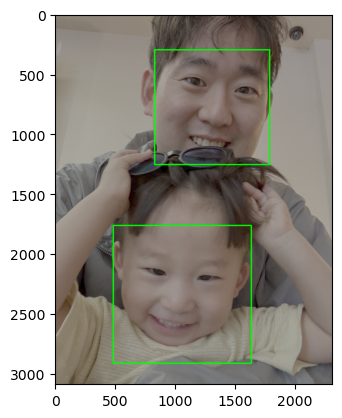

In [4]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 10, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [5]:
model_path = 'models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

### 랜드마크 탐색

In [6]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


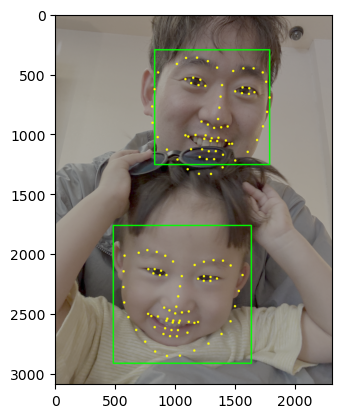

In [7]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [8]:
x, y, w, h = [], [], [], [] # x, y, w, h를 빈 리스트로 초기화

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x.append(landmark[30][0]) # 이미지에서 코 부위의 x값
    y.append(landmark[30][1] + dlib_rect.height() // 2) # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w.append(dlib_rect.width())
    h.append(dlib_rect.width())
    print (f'(x,y) : ({x[-1]},{y[-1]})')
    print (f'(w,h) : ({w[-1]},{h[-1]})')

(1358, 876)
(x,y) : (1358,1355)
(w,h) : (959,959)
(1010, 2442)
(x,y) : (1010,3017)
(w,h) : (1151,1151)


### 각 얼굴 별 고양이 스티커 이미지 생성 & 위치 조정

In [9]:
sticker_path = 'images/cat-whiskers.png' # 고양이 수염 이미지의 경로
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)  # 4채널로 읽기
img_stickers = []
for i in range(len(x)):
    img_stickers.append(cv2.resize(img_sticker, (w[i],h[i]))) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
    print (img_stickers[i].shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

(959, 959, 4)
(1151, 1151, 4)


In [10]:
refined_x, refined_y = [], [] # refined_x, refined_y를 빈 리스트로 초기화

for i in range(len(x)):
    refined_x.append(x[i] - w[i] // 2)
    refined_y.append(y[i] - h[i])

    if refined_x[i] < 0:
        img_stickers[i] = img_stickers[i][:, -refined_x:]
        refined_x[i] = 0

    if refined_y[i] < 0:
        img_stickers[i] = img_stickers[i][-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
        refined_y[i] = 0

    print (f'(x,y) : ({refined_x[i]},{refined_y[i]})')

(x,y) : (879,396)
(x,y) : (435,1866)


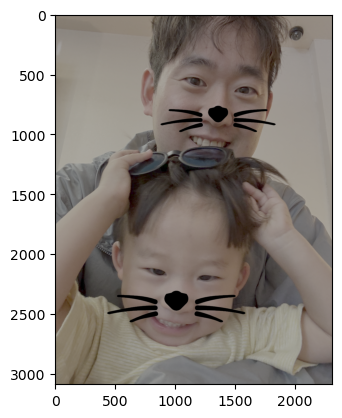

In [11]:
# img_bgr를 BGRA로 변환
if img_bgr.shape[2] == 3:
    img_bgr = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2BGRA)

# sticker_area도 BGRA로 추출
sticker_area = [] # sticker_area를 빈 리스트로 초기화
for i in range(len(x)):
    sticker_area.append(img_bgr[refined_y[i]:refined_y[i]+img_stickers[i].shape[0], refined_x[i]:refined_x[i]+img_stickers[i].shape[1]])

    # 알파 채널을 마스크로 사용하여 합성
    alpha = img_stickers[i][:, :, 3] / 255.0
    for c in range(0, 3):  # BGR 채널만 합성
        sticker_area[i][:, :, c] = (1. - alpha) * sticker_area[i][:, :, c] + alpha * img_stickers[i][:, :, c]

    img_bgr[refined_y[i]:refined_y[i]+img_stickers[i].shape[0], refined_x[i]:refined_x[i]+img_stickers[i].shape[1]] = sticker_area[i]

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGRA2RGB)) # BGRA 이미지를 RGB로 변환하여 출력
plt.show()